<a href="https://colab.research.google.com/github/VishruthVS/ML_Lab/blob/main/7/DecisionTreeClassifier_WeatherForecastingr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Outlook Temperature Humidity   Windy Play
0     Sunny         Hot     High    Weak   No
1     Sunny         Hot     High  Strong   No
2  Overcast         Hot     High    Weak  Yes
3      Rain        Mild     High    Weak  Yes
4      Rain        Cool   Normal    Weak  Yes


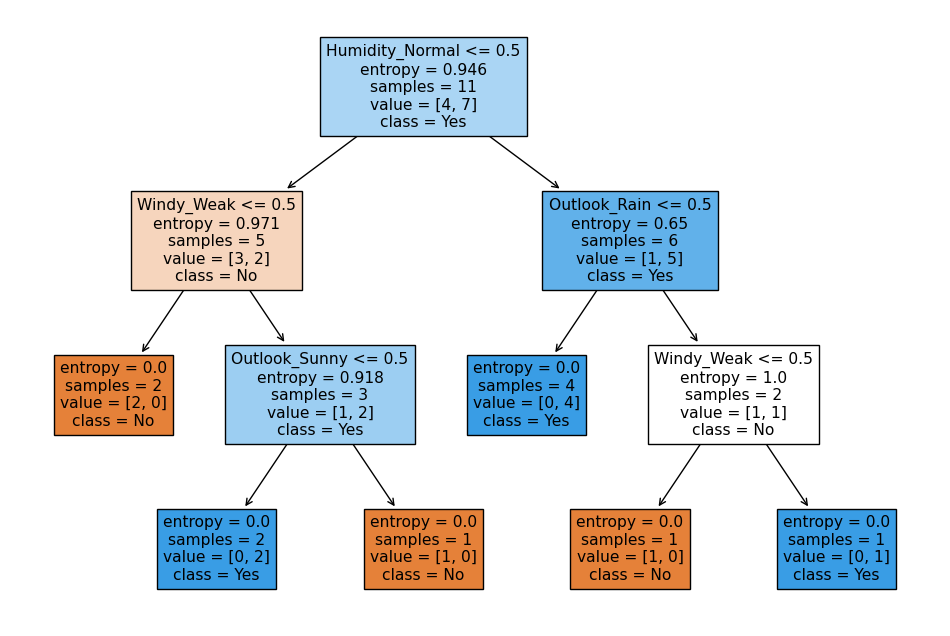

ID3 Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores (ID3): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (ID3): 0.7333333333333333


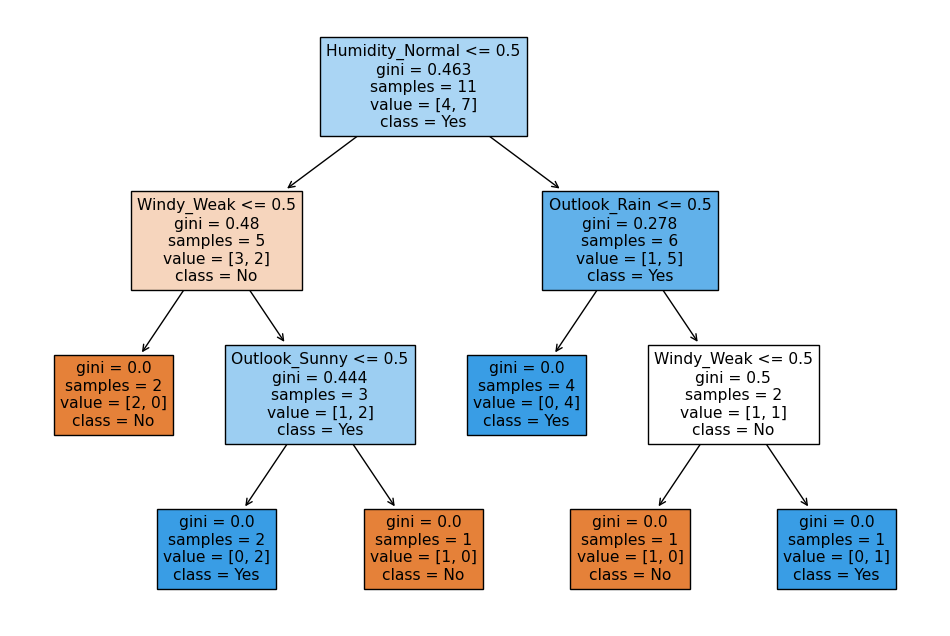

CART Algorithm Results:
Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

          No       0.50      1.00      0.67         1
         Yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Cross-Validation Scores (CART): [0.66666667 1.         0.66666667 0.33333333 1.        ]
Mean CV Accuracy (CART): 0.7333333333333333


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

file_path = "weather_forecast.csv"
df = pd.read_csv(file_path)

print(df.head())
encoder = OneHotEncoder(drop='first')
X_encoded = encoder.fit_transform(df.drop('Play', axis=1)).toarray()
y = df['Play']

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_id3.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_id3, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

y_pred_id3 = clf_id3.predict(X_test)

accuracy_id3 = accuracy_score(y_test, y_pred_id3)
report_id3 = classification_report(y_test, y_pred_id3)

print("ID3 Algorithm Results:")
print(f"Accuracy: {accuracy_id3}")
print(f"Classification Report:\n{report_id3}")

cv_scores_id3 = cross_val_score(clf_id3, X_encoded, y, cv=5)
print("Cross-Validation Scores (ID3):", cv_scores_id3)
print("Mean CV Accuracy (ID3):", cv_scores_id3.mean())

clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_cart.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf_cart, filled=True, feature_names=encoder.get_feature_names_out(['Outlook', 'Temperature', 'Humidity', 'Windy']), class_names=['No', 'Yes'])
plt.show()

y_pred_cart = clf_cart.predict(X_test)

accuracy_cart = accuracy_score(y_test, y_pred_cart)
report_cart = classification_report(y_test, y_pred_cart)

print("CART Algorithm Results:")
print(f"Accuracy: {accuracy_cart}")
print(f"Classification Report:\n{report_cart}")

cv_scores_cart = cross_val_score(clf_cart, X_encoded, y, cv=5)
print("Cross-Validation Scores (CART):", cv_scores_cart)
print("Mean CV Accuracy (CART):", cv_scores_cart.mean())